In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import numpy as np
import shap #Check version, SHAP 0.36.0
import time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, InputLayer, GRU, Bidirectional,Conv1D, MaxPooling1D, Flatten
from sklearn.ensemble import IsolationForest
from keras.preprocessing.sequence import TimeseriesGenerator

In [4]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [5]:
df_predict = pd.read_csv(r"C:/Users/Nicklas Branding/Desktop/infection_per_sweden_on_covid19.csv",encoding="latin-1")

In [6]:
df_predict.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0,0,0
1,2020,7,0,0,0,1,0,0,0,0,0,0,0
2,2020,8,0,0,0,1,0,0,0,0,0,0,0
3,2020,9,13,0,0,14,0,0,0,0,0,0,0
4,2020,10,211,2,2,225,2,3,3,0,0,0,0


In [7]:
df_predict = df_predict.drop(['Antal_fall_100000inv_vecka', 'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv', 'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade', 'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka', 'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv','veckonummer','år'],axis=1)

In [8]:
feature = ['Antal_fall_vecka']

In [9]:
dfX_predict = df_predict[feature]

In [10]:
dfX_predict.shape

(101, 1)

In [11]:
mu = df_predict.mean(0)
sd = df_predict.std(0)
df_norm = (df_predict - mu) / sd
df_norm.head(3)
Y_mu_2 = np.asarray(mu[feature])
Y_sd_2 = np.asarray(sd[feature])

In [12]:
df_norm = np.asarray(df_norm)
df_norm.reshape((-1,1))

array([[-0.80600237],
       [-0.80605767],
       [-0.80605767],
       [-0.80533875],
       [-0.79438912],
       [-0.7597153 ],
       [-0.7549594 ],
       [-0.6978333 ],
       [-0.62749022],
       [-0.59923133],
       [-0.59856771],
       [-0.57362689],
       [-0.59414362],
       [-0.57639195],
       [-0.59209748],
       [-0.60371072],
       [-0.5693687 ],
       [-0.47308938],
       [-0.4121475 ],
       [-0.41491256],
       [-0.39378752],
       [-0.569424  ],
       [-0.68555644],
       [-0.71635919],
       [-0.73328134],
       [-0.72000906],
       [-0.69468113],
       [-0.69257969],
       [-0.71276461],
       [-0.73969628],
       [-0.73239652],
       [-0.71801822],
       [-0.69103125],
       [-0.64463358],
       [-0.60465084],
       [-0.5694793 ],
       [-0.49526515],
       [-0.29977554],
       [ 0.21557597],
       [ 0.59886831],
       [ 0.92591937],
       [ 0.9604826 ],
       [ 1.1604516 ],
       [ 1.23107118],
       [ 1.60678726],
       [ 1

In [13]:
training_data = df_norm[0:61]
testing_data_38 = df_norm[61:101]

In [14]:
look_back=2
train_genertor = TimeseriesGenerator(training_data,training_data,length=look_back,batch_size=1)
test_genertor_38 = TimeseriesGenerator(testing_data_38,testing_data_38,length=look_back,batch_size=1)
print("samples", len(train_genertor))

samples 59


In [15]:
X_test_1_sample = test_genertor_38[0]
Y_test_1_sample = testing_data_38[0:1]

X_test_2_sample = test_genertor_38[1]
Y_test_2_sample = testing_data_38[1:2]

X_test_3_sample = test_genertor_38[2]
Y_test_3_sample = testing_data_38[2:3]

X_test_4_sample = test_genertor_38[3]
Y_test_4_sample = testing_data_38[3:4]

X_test_5_sample = test_genertor_38[4]
Y_test_5_sample = testing_data_38[4:5]

X_test_6_sample = test_genertor_38[5]
Y_test_6_sample = testing_data_38[5:6]

X_test_7_sample = test_genertor_38[6]
Y_test_7_sample = testing_data_38[6:7]

X_test_8_sample = test_genertor_38[7]
Y_test_8_sample = testing_data_38[7:8]

X_test_9_sample = test_genertor_38[8]
Y_test_9_sample = testing_data_38[8:9]

X_test_10_sample = test_genertor_38[9]
Y_test_10_sample = testing_data_38[9:10]

X_test_11_sample = test_genertor_38[10]
Y_test_11_sample = testing_data_38[10:11]

X_test_12_sample = test_genertor_38[11]
Y_test_12_sample = testing_data_38[11:12]

X_test_13_sample = test_genertor_38[12]
Y_test_13_sample = testing_data_38[12:13]

X_test_14_sample = test_genertor_38[13]
Y_test_14_sample = testing_data_38[13:14]

X_test_15_sample = test_genertor_38[14]
Y_test_15_sample = testing_data_38[14:15]

X_test_16_sample = test_genertor_38[15]
Y_test_16_sample = testing_data_38[15:16]

X_test_17_sample = test_genertor_38[16]
Y_test_17_sample = testing_data_38[16:17]

X_test_18_sample = test_genertor_38[17]
Y_test_18_sample = testing_data_38[17:18]

X_test_19_sample = test_genertor_38[18]
Y_test_19_sample = testing_data_38[18:19]

X_test_20_sample = test_genertor_38[19]
Y_test_20_sample = testing_data_38[19:20]

X_test_21_sample = test_genertor_38[20]
Y_test_21_sample = testing_data_38[20:21]

X_test_22_sample = test_genertor_38[21]
Y_test_22_sample = testing_data_38[21:22]

X_test_23_sample = test_genertor_38[22]
Y_test_23_sample = testing_data_38[22:23]

X_test_24_sample = test_genertor_38[23]
Y_test_24_sample = testing_data_38[23:24]

X_test_25_sample = test_genertor_38[24]
Y_test_25_sample = testing_data_38[24:25]

X_test_26_sample = test_genertor_38[25]
Y_test_26_sample = testing_data_38[25:26]

X_test_27_sample = test_genertor_38[26]
Y_test_27_sample = testing_data_38[26:27]

X_test_28_sample = test_genertor_38[27]
Y_test_28_sample = testing_data_38[27:28]

X_test_29_sample = test_genertor_38[28]
Y_test_29_sample = testing_data_38[28:29]

X_test_30_sample = test_genertor_38[29]
Y_test_30_sample = testing_data_38[29:30]

X_test_31_sample = test_genertor_38[30]
Y_test_31_sample = testing_data_38[30:31]

X_test_32_sample = test_genertor_38[31]
Y_test_32_sample = testing_data_38[31:32]

X_test_33_sample = test_genertor_38[32]
Y_test_33_sample = testing_data_38[32:33]

X_test_34_sample = test_genertor_38[33]
Y_test_34_sample = testing_data_38[33:34]

X_test_35_sample = test_genertor_38[34]
Y_test_35_sample = testing_data_38[34:35]

X_test_36_sample = test_genertor_38[35]
Y_test_36_sample = testing_data_38[35:36]

X_test_37_sample = test_genertor_38[36]
Y_test_37_sample = testing_data_38[36:37]

X_test_38_sample = test_genertor_38[37]
Y_test_38_sample = testing_data_38[37:38]

In [77]:
LSTM_CNN = Sequential()
LSTM_CNN.add(LSTM(252,activation="relu", return_sequences=True,input_shape=(look_back,1)))
LSTM_CNN.add(LSTM(128,activation="relu", return_sequences=True))
LSTM_CNN.add(Conv1D(128,2,activation="relu"))
LSTM_CNN.add(MaxPooling1D(pool_size=1))
LSTM_CNN.add(Flatten())
LSTM_CNN.add(Dense(1))
LSTM_CNN.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'mean_absolute_error')
LSTM_CNN.fit(train_genertor,  steps_per_epoch = 1,epochs = 500, verbose=1)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.2155
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 0.8074
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9597
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 0.6866
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 0.7560
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6982
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 0.6444
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 0.3699
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 0.7113
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 0.7376
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5711
Epoch 12/500
1/1 [==============================] - 0s 12ms/step - loss: 1.1585
Epoch 13/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 12ms/step - loss: 0.3780
Epoch 104/500
1/1 [==============================] - 0s 13ms/step - loss: 0.7604
Epoch 105/500
1/1 [==============================] - 0s 12ms/step - loss: 0.5541
Epoch 106/500
1/1 [==============================] - 0s 13ms/step - loss: 0.3755
Epoch 107/500
1/1 [==============================] - 0s 11ms/step - loss: 0.2731
Epoch 108/500
1/1 [==============================] - 0s 13ms/step - loss: 0.8852
Epoch 109/500
1/1 [==============================] - 0s 10ms/step - loss: 0.2706
Epoch 110/500
1/1 [==============================] - 0s 11ms/step - loss: 0.6860
Epoch 111/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6681
Epoch 112/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5476
Epoch 113/500
1/1 [==============================] - 0s 11ms/step - loss: 0.7061
Epoch 114/500
1/1 [==============================] - 0s 11ms/step - loss: 0.6682
Epoch 115/500
1/1 [========================

1/1 [==============================] - 0s 16ms/step - loss: 0.2658
Epoch 205/500
1/1 [==============================] - 0s 16ms/step - loss: 0.4036
Epoch 206/500
1/1 [==============================] - 0s 13ms/step - loss: 0.4482
Epoch 207/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3393
Epoch 208/500
1/1 [==============================] - 0s 17ms/step - loss: 0.1285
Epoch 209/500
1/1 [==============================] - 0s 20ms/step - loss: 0.3763
Epoch 210/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4716
Epoch 211/500
1/1 [==============================] - 0s 17ms/step - loss: 0.4445
Epoch 212/500
1/1 [==============================] - 0s 15ms/step - loss: 0.9897
Epoch 213/500
1/1 [==============================] - 0s 12ms/step - loss: 0.3738
Epoch 214/500
1/1 [==============================] - 0s 14ms/step - loss: 0.2020
Epoch 215/500
1/1 [==============================] - 0s 13ms/step - loss: 0.2048
Epoch 216/500
1/1 [=======================

1/1 [==============================] - 0s 14ms/step - loss: 0.0078
Epoch 306/500
1/1 [==============================] - 0s 17ms/step - loss: 0.1544
Epoch 307/500
1/1 [==============================] - 0s 15ms/step - loss: 0.0434
Epoch 308/500
1/1 [==============================] - 0s 14ms/step - loss: 0.1264
Epoch 309/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0759
Epoch 310/500
1/1 [==============================] - 0s 13ms/step - loss: 0.0331
Epoch 311/500
1/1 [==============================] - 0s 14ms/step - loss: 0.1051
Epoch 312/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0609
Epoch 313/500
1/1 [==============================] - 0s 14ms/step - loss: 0.0363
Epoch 314/500
1/1 [==============================] - 0s 14ms/step - loss: 0.4135
Epoch 315/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0674
Epoch 316/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5678
Epoch 317/500
1/1 [=======================

1/1 [==============================] - 0s 13ms/step - loss: 0.4343
Epoch 407/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0106
Epoch 408/500
1/1 [==============================] - 0s 9ms/step - loss: 0.1423
Epoch 409/500
1/1 [==============================] - 0s 11ms/step - loss: 0.1736
Epoch 410/500
1/1 [==============================] - 0s 11ms/step - loss: 0.1595
Epoch 411/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 412/500
1/1 [==============================] - 0s 10ms/step - loss: 0.1783
Epoch 413/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0218
Epoch 414/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2706
Epoch 415/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0548
Epoch 416/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 417/500
1/1 [==============================] - 0s 11ms/step - loss: 0.1287
Epoch 418/500
1/1 [==========================

In [78]:
y_predict_38 = LSTM_CNN.predict(test_genertor_38)
y_predict_38 = y_predict_38.reshape((-1))
print(y_predict_38)

[ 1.4056054   1.3301781   1.1387882   1.0913807   0.92006284  0.55630964
  0.09545197 -0.3732377  -0.40913793 -0.57372934 -0.6273709  -0.65291137
 -0.6601157  -0.6658722  -0.6465552  -0.6153829  -0.5785003  -0.5293929
 -0.48528028 -0.4629008  -0.44792095 -0.41872364 -0.42235488 -0.5018346
 -0.559581   -0.5627999  -0.5663487  -0.55328333 -0.5114525  -0.5020519
 -0.516507   -0.47604322 -0.34899005 -0.10744978  0.08026154  0.4144401
  0.6618296   1.1730953 ]


In [79]:
y_predict_sample_1 = y_predict_38[0:1]
y_predict_sample_2 = y_predict_38[1:2]
y_predict_sample_3 = y_predict_38[2:3]
y_predict_sample_4 = y_predict_38[3:4]
y_predict_sample_5 = y_predict_38[4:5]
y_predict_sample_6 = y_predict_38[5:6]
y_predict_sample_7 = y_predict_38[6:7]
y_predict_sample_8 = y_predict_38[7:8]
y_predict_sample_9 = y_predict_38[8:9]
y_predict_sample_10 = y_predict_38[9:10]
y_predict_sample_11 = y_predict_38[10:11]
y_predict_sample_12 = y_predict_38[11:12]
y_predict_sample_13 = y_predict_38[12:13]
y_predict_sample_14 = y_predict_38[13:14]
y_predict_sample_15 = y_predict_38[14:15]
y_predict_sample_16 = y_predict_38[15:16]
y_predict_sample_17 = y_predict_38[16:17]
y_predict_sample_18 = y_predict_38[17:18]
y_predict_sample_19 = y_predict_38[18:19]
y_predict_sample_20 = y_predict_38[19:20]
y_predict_sample_21 = y_predict_38[20:21]
y_predict_sample_22 = y_predict_38[21:22]
y_predict_sample_23 = y_predict_38[22:23]
y_predict_sample_24 = y_predict_38[23:24]
y_predict_sample_25 = y_predict_38[24:25]
y_predict_sample_26 = y_predict_38[25:26]
y_predict_sample_27 = y_predict_38[26:27]
y_predict_sample_28 = y_predict_38[27:28]
y_predict_sample_29 = y_predict_38[28:29]
y_predict_sample_30 = y_predict_38[29:30]
y_predict_sample_31 = y_predict_38[30:31]
y_predict_sample_32 = y_predict_38[31:32]
y_predict_sample_33 = y_predict_38[32:33]
y_predict_sample_34 = y_predict_38[33:34]
y_predict_sample_35 = y_predict_38[34:35]
y_predict_sample_36 = y_predict_38[35:36]
y_predict_sample_37 = y_predict_38[36:37]
y_predict_sample_38 = y_predict_38[37:38]

In [85]:
r2scoremodel_39=r2_score(testing_data_38[:-2], y_predict_38)
print("r2 score 38 week prediction: ",r2scoremodel_39)

r2 score 38 week prediction:  0.9789413426835231


In [86]:
print("RMSE 38 week prediction: {0:0.4f}".format(mean_squared_error(testing_data_38[:-2], y_predict_38)))

RMSE 38 week prediction: 0.0091


In [87]:
print("MAE 38 week prediction: {0:0.4f}".format(mean_absolute_error(testing_data_38[:-2], y_predict_38)))

MAE 38 week prediction: 0.0593


In [88]:
print("MAE 38 samples")
print("{0:0.4f}, ".format(mean_absolute_error(Y_test_1_sample, y_predict_sample_1)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_2_sample, y_predict_sample_2)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_3_sample, y_predict_sample_3)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_4_sample, y_predict_sample_4)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_5_sample, y_predict_sample_5)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_6_sample, y_predict_sample_6)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_7_sample, y_predict_sample_7)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_8_sample, y_predict_sample_8)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_9_sample, y_predict_sample_9)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_10_sample, y_predict_sample_10)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_11_sample, y_predict_sample_11)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_12_sample, y_predict_sample_12)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_13_sample, y_predict_sample_13)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_14_sample, y_predict_sample_14)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_15_sample, y_predict_sample_15)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_16_sample, y_predict_sample_16)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_17_sample, y_predict_sample_17)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_18_sample, y_predict_sample_18)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_19_sample, y_predict_sample_19)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_20_sample, y_predict_sample_20)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_21_sample, y_predict_sample_21)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_22_sample, y_predict_sample_22)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_23_sample, y_predict_sample_23)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_24_sample, y_predict_sample_24)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_25_sample, y_predict_sample_25)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_26_sample, y_predict_sample_26)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_27_sample, y_predict_sample_27)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_28_sample, y_predict_sample_28)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_29_sample, y_predict_sample_29)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_30_sample, y_predict_sample_30)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_31_sample, y_predict_sample_31)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_32_sample, y_predict_sample_32)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_33_sample, y_predict_sample_33)))

print(" {0:0.4f},".format(mean_absolute_error(Y_test_34_sample, y_predict_sample_34)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_35_sample, y_predict_sample_35)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_36_sample, y_predict_sample_36)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_37_sample, y_predict_sample_37)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_38_sample, y_predict_sample_38)))

MAE 38 samples
0.0636, 
 0.1330,
0.0478,
0.0550,
0.1364,
 0.0707,
0.1033,
0.0082,
0.1060,
 0.0107,
0.0212,
0.0435,
0.0425,
 0.0565,
0.0554,
0.0435,
0.0362,
 0.0218,
0.0010,
0.0143,
0.0117,
 0.0129,
0.0570,
0.0420,
0.0085,
 0.0092,
0.0109,
0.0278,
0.0074,
 0.0229,
0.0097,
0.0082,
0.0648,
 0.0397,
0.1232,
0.1891,
0.1110,
0.4282,


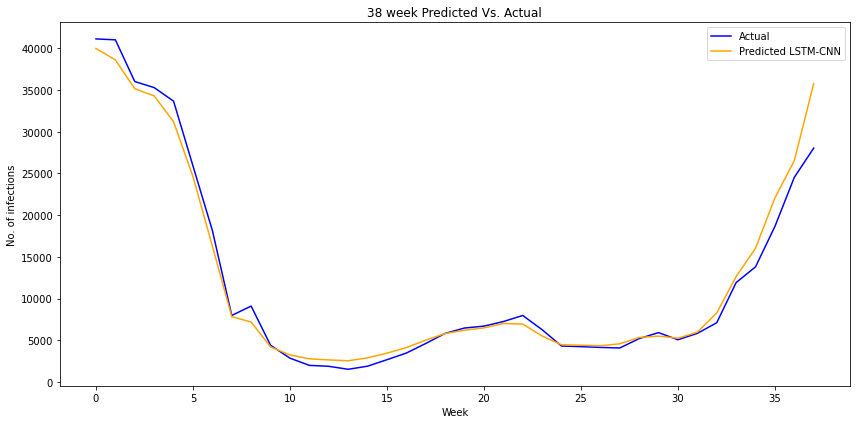

In [90]:
fig, ax = plt.subplots(figsize = (12, 6))
# creating the bar plot
ax.plot(testing_data_38[:-2]*Y_sd_2+Y_mu_2, label='Actual', color ='blue')
ax.plot(y_predict_38*Y_sd_2+Y_mu_2,label='Predicted LSTM-CNN', color ='orange')
ax.set_xlabel("Week")
ax.set_ylabel("No. of infections")
ax.set_title("38 week Predicted Vs. Actual")
ax.legend()
fig.tight_layout()
plt.show()  